<a href="https://colab.research.google.com/github/andrewburner/msds422-assign2/blob/master/Assignment4_Boston.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import os
import itertools
from math import sqrt, log
from scipy import stats as st
#import cvxopt

import sklearn 
from sklearn.preprocessing import StandardScaler # used for variable scaling data
from sklearn.preprocessing import MinMaxScaler as Scaler # used for variable scaling data
from sklearn.preprocessing import PowerTransformer, StandardScaler

import sklearn.linear_model 
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.ensemble import RandomForestRegressor # Random Forest package
from sklearn.ensemble import ExtraTreesRegressor # Extra Trees package
from sklearn.ensemble import GradientBoostingRegressor # Gradient Boosting package

from sklearn.metrics import mean_squared_error, r2_score 
from sklearn.metrics import make_scorer, accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import ShuffleSplit

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold

import statsmodels.api as sm

from matplotlib import pyplot as plt
from matplotlib import rc
import seaborn as sns
sns.set_style("whitegrid")
sns.set(style="whitegrid", color_codes=True)
plt.rc("font", size=14)

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
np.set_printoptions(precision=4)

In [3]:
%matplotlib inline

In [4]:
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

In [5]:
url = 'https://raw.githubusercontent.com/andrewburner/msds422-assign2/master/boston.csv'
data = pd.read_csv(url,  sep=',')
df = pd.DataFrame(data)
df.head()

,neighborhood,crim,zn,indus,chas,nox,rooms,age,dis,rad,tax,ptratio,lstat,mv
0,Nahant,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98,24.0
1,Swampscott,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14,21.6
2,Swanpscott,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,4.03,34.7
3,Marblehead,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,2.94,33.4
4,Marblehead,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,5.33,36.2


In [6]:
df.shape

(506, 14)

In [7]:
df.dtypes

neighborhood     object
crim            float64
zn              float64
indus           float64
chas              int64
nox             float64
rooms           float64
age             float64
dis             float64
rad               int64
tax               int64
ptratio         float64
lstat           float64
mv              float64
dtype: object

In [8]:
df=df.drop('neighborhood', 1)

In [9]:
df.isnull().sum()

crim       0
zn         0
indus      0
chas       0
nox        0
rooms      0
age        0
dis        0
rad        0
tax        0
ptratio    0
lstat      0
mv         0
dtype: int64

In [10]:
boston_df1=df.copy()

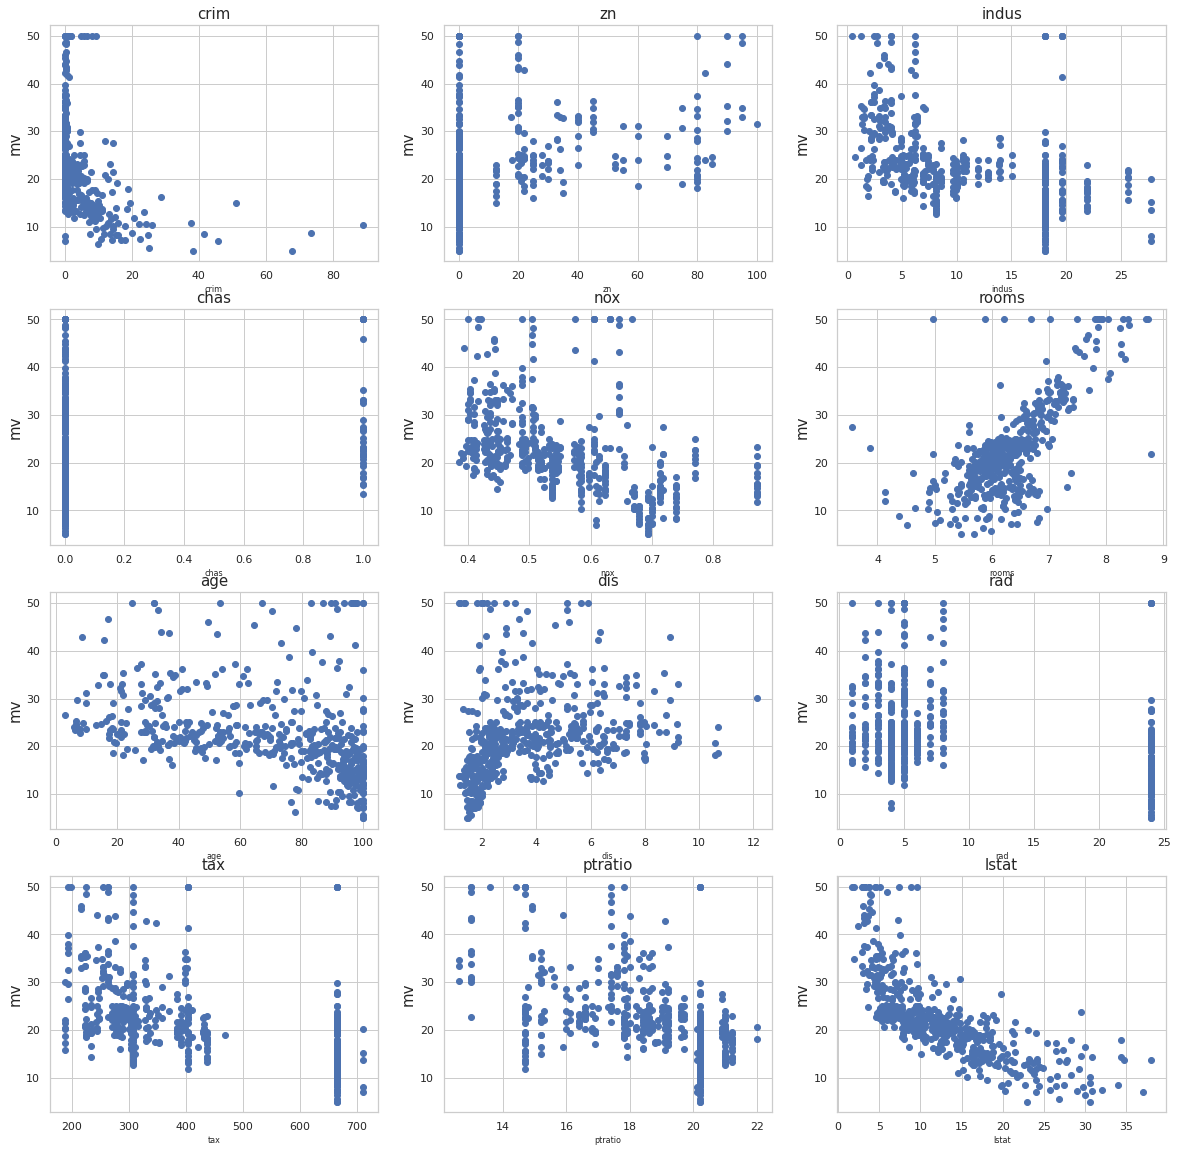

In [11]:
features = boston_df1.drop('mv', 1).columns
target = boston_df1['mv']
plt.figure(figsize=(20,20))
for index, feature_name in enumerate(features):
    plt.subplot(4,len(features)/4, index+1)
    plt.scatter(boston_df1[feature_name], target)
    plt.title(feature_name, fontsize=15)
    plt.xlabel(feature_name, fontsize=8)
    plt.ylabel('mv', fontsize=15)

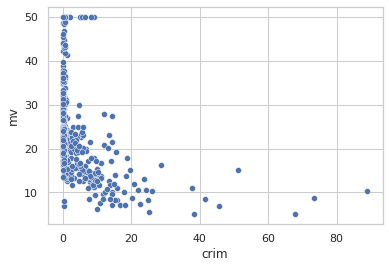

In [12]:
sns.scatterplot(data=boston_df1, x="crim", y="mv")

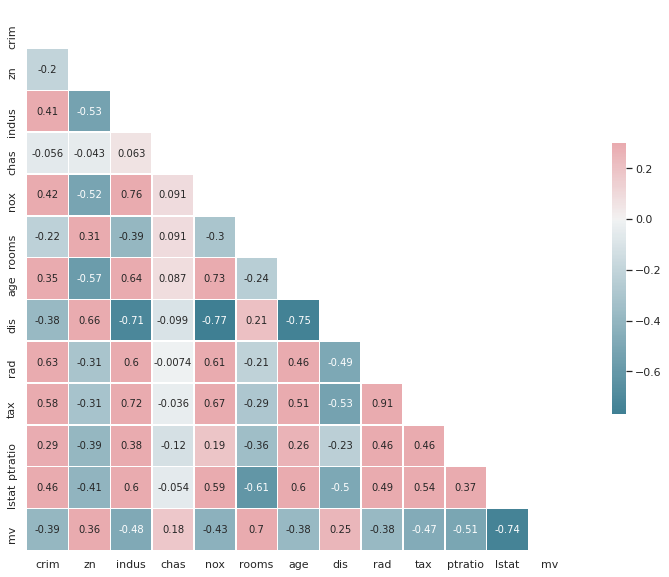

In [13]:
plt.figure(figsize=(15,10))
corr=boston_df1.corr(method='pearson')
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(corr, mask=mask, cmap=sns.diverging_palette(220, 10, as_cmap=True), annot=True, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.show()

**Transform variables that need transforming here**

In [14]:
boston_df1['log_dis']=np.log(boston_df1['dis'])

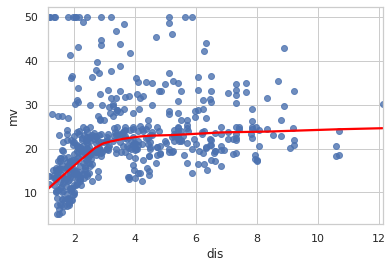

In [15]:
sns.regplot(data=boston_df1, x="dis", y="mv", lowess=True, line_kws={"color": "red"})

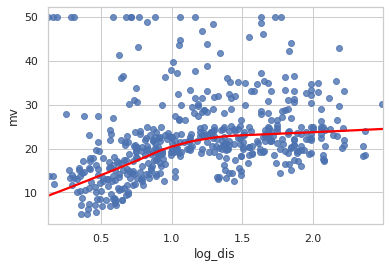

In [16]:
sns.regplot(data=boston_df1, x="log_dis", y="mv", lowess=True, line_kws={"color": "red"})

In [17]:
target = ['mv']
df_predictors = boston_df1.drop(columns=target)
df_predictors.drop('dis',1,inplace=True)

In [18]:
df_scaled = df_predictors.transform(lambda x: (x - x.min()) / (x.max() - x.min()))

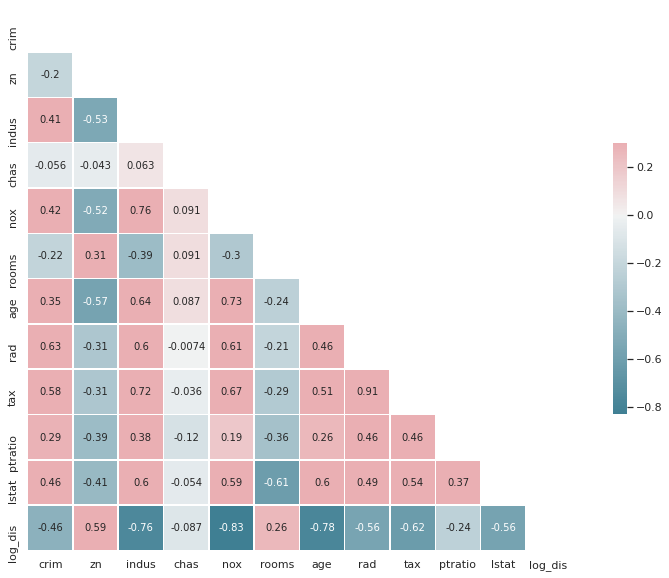

In [19]:
plt.figure(figsize=(15,10))
corr=df_scaled.corr(method='pearson')
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(corr, mask=mask, cmap=sns.diverging_palette(220, 10, as_cmap=True), annot=True, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.show()

In [20]:
columns = ['crim','zn','indus','chas','nox','rooms','age','dis','rad','tax','ptratio','lstat', 'log_dis']
target = ['mv']
df_target = boston_df1.drop(columns=columns)

In [21]:
X_train, X_test, y_train, y_test = train_test_split(df_scaled, df_target, test_size=0.2)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(404, 12) (404, 1)
(102, 12) (102, 1)


**Linear Regression**

In [22]:
Y = y_train['mv']
X = X_train
linreg1 = sm.OLS(Y, X)
results = linreg1.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                     mv   R-squared (uncentered):                   0.947
Model:                            OLS   Adj. R-squared (uncentered):              0.945
Method:                 Least Squares   F-statistic:                              582.3
Date:                Sun, 11 Oct 2020   Prob (F-statistic):                   2.83e-241
Time:                        03:13:35   Log-Likelihood:                         -1268.7
No. Observations:                 404   AIC:                                      2561.
Df Residuals:                     392   BIC:                                      2609.
Df Model:                          12                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
crim          -5.8033      5.098     -1.138      0.256     -15.825       4.219
zn             5.1341      1.643      3.124      0.002       1.903       8.365
indus          4.6159      2.116      2.182      0.030       0.456       8.776
chas           3.3428      1.149      2.909      0.004       1.084       5.602
nox           -0.9892      2.366     -0.418      0.676      -5.641       3.663
rooms         41.0595      2.271     18.081      0.000      36.595      45.524
age            5.1331      1.671      3.072      0.002       1.848       8.418
rad            2.7982      1.966      1.423      0.156      -1.068       6.664
tax           -5.3632      2.495     -2.150      0.032     -10.268      -0.458
ptratio       -1.1802      1.543     -0.765      0.445      -4.214       1.854
lstat        -13.1316      2.325     -5.649      0.000     -17.702      -8.561
log_dis        2.9753      1.988      1.497      0.135      -0.933       6.884
==============================================================================
Omnibus:                      151.042   Durbin-Watson:                   2.167
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              787.799
Skew:                           1.521   Prob(JB):                    8.54e-172
Kurtosis:                       9.128   Cond. No.                         27.2
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [23]:
Y = y_train['mv']
X2 = X_train.drop('ptratio', 1)
linreg2 = sm.OLS(Y, X2)
results2 = linreg2.fit()
results2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                     mv   R-squared (uncentered):                   0.947
Model:                            OLS   Adj. R-squared (uncentered):              0.945
Method:                 Least Squares   F-statistic:                              635.8
Date:                Sun, 11 Oct 2020   Prob (F-statistic):                   1.47e-242
Time:                        03:13:35   Log-Likelihood:                         -1269.0
No. Observations:                 404   AIC:                                      2560.
Df Residuals:                     393   BIC:                                      2604.
Df Model:                          11                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
crim          -5.7950      5.095     -1.137      0.256     -15.812       4.222
zn             5.4774      1.580      3.467      0.001       2.371       8.584
indus          4.1774      2.036      2.052      0.041       0.175       8.179
chas           3.4296      1.143      3.001      0.003       1.183       5.676
nox           -0.5095      2.280     -0.223      0.823      -4.993       3.973
rooms         40.9528      2.265     18.078      0.000      36.499      45.407
age            4.8824      1.638      2.982      0.003       1.663       8.102
rad            2.5587      1.940      1.319      0.188      -1.256       6.373
tax           -5.5362      2.483     -2.229      0.026     -10.418      -0.654
lstat        -13.4018      2.296     -5.836      0.000     -17.917      -8.887
log_dis        2.3100      1.787      1.293      0.197      -1.203       5.823
==============================================================================
Omnibus:                      147.410   Durbin-Watson:                   2.163
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              743.290
Skew:                           1.491   Prob(JB):                    3.95e-162
Kurtosis:                       8.938   Cond. No.                         24.7
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [24]:
Y = y_train['mv']
X3 = X_train.drop(['ptratio','nox'], 1)
linreg3 = sm.OLS(Y, X3)
results3 = linreg3.fit()
results3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                     mv   R-squared (uncentered):                   0.947
Model:                            OLS   Adj. R-squared (uncentered):              0.945
Method:                 Least Squares   F-statistic:                              701.1
Date:                Sun, 11 Oct 2020   Prob (F-statistic):                   5.54e-244
Time:                        03:13:35   Log-Likelihood:                         -1269.1
No. Observations:                 404   AIC:                                      2558.
Df Residuals:                     394   BIC:                                      2598.
Df Model:                          10                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
crim          -5.6912      5.068     -1.123      0.262     -15.654       4.272
zn             5.4677      1.578      3.466      0.001       2.366       8.569
indus          4.0553      1.958      2.071      0.039       0.205       7.906
chas           3.4123      1.139      2.996      0.003       1.173       5.651
rooms         40.8440      2.210     18.483      0.000      36.500      45.188
age            4.7684      1.554      3.068      0.002       1.713       7.824
rad            2.5321      1.934      1.309      0.191      -1.271       6.335
tax           -5.5812      2.472     -2.258      0.025     -10.441      -0.721
lstat        -13.5073      2.245     -6.017      0.000     -17.920      -9.094
log_dis        2.4533      1.666      1.473      0.142      -0.822       5.728
==============================================================================
Omnibus:                      147.749   Durbin-Watson:                   2.164
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              747.794
Skew:                           1.494   Prob(JB):                    4.16e-163
Kurtosis:                       8.958   Cond. No.                         23.4
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [25]:
Y = y_train['mv']
X4 = X_train.drop(['ptratio','nox','log_dis'], 1)
linreg4 = sm.OLS(Y, X4)
results4 = linreg4.fit()
results4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                     mv   R-squared (uncentered):                   0.946
Model:                            OLS   Adj. R-squared (uncentered):              0.945
Method:                 Least Squares   F-statistic:                              776.4
Date:                Sun, 11 Oct 2020   Prob (F-statistic):                   5.69e-245
Time:                        03:13:35   Log-Likelihood:                         -1270.2
No. Observations:                 404   AIC:                                      2558.
Df Residuals:                     395   BIC:                                      2594.
Df Model:                           9                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
crim          -7.0760      4.987     -1.419      0.157     -16.880       2.728
zn             6.1047      1.519      4.018      0.000       3.118       9.092
indus          3.6399      1.941      1.875      0.061      -0.176       7.456
chas           3.3340      1.139      2.927      0.004       1.094       5.574
rooms         43.2620      1.481     29.209      0.000      40.350      46.174
age            4.1284      1.494      2.763      0.006       1.190       7.066
rad            2.3221      1.932      1.202      0.230      -1.476       6.120
tax           -5.4739      2.475     -2.212      0.028     -10.339      -0.609
lstat        -12.1611      2.053     -5.923      0.000     -16.198      -8.125
==============================================================================
Omnibus:                      147.497   Durbin-Watson:                   2.169
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              806.665
Skew:                           1.461   Prob(JB):                    6.84e-176
Kurtosis:                       9.275   Cond. No.                         22.0
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [78]:
np.std(boston_df1['rooms'])

0.7019225143345689

In [26]:
lrm_mv = LinearRegression()

# Fit data on to the model
lrm_mv.fit(X4, Y)

# Predict
y_predicted_lrm = lrm_mv.predict(X_test.drop(['ptratio','nox','log_dis'], 1))

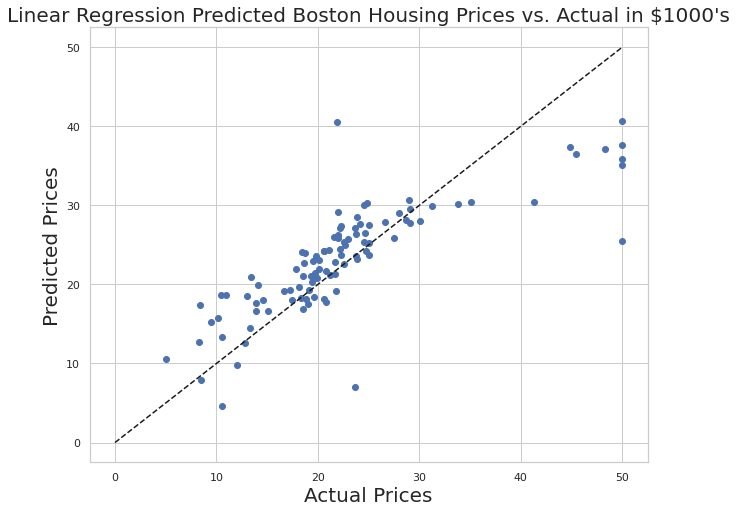

In [27]:
plt.figure(figsize=(10,8))
plt.scatter(y_test['mv'], y_predicted_lrm)
plt.plot([0, 50], [0, 50], '--k')
plt.axis('tight')
plt.ylabel('Predicted Prices', fontsize=20);
plt.xlabel('Actual Prices', fontsize=20);
plt.title("Linear Regression Predicted Boston Housing Prices vs. Actual in $1000's", fontsize=20)

plt.rc('xtick', labelsize=15)
plt.rc('ytick', labelsize=15)

plt.show()

In [29]:
X=X_test.drop(['ptratio','nox','log_dis'],1)
Y=y_test['mv']
print("Linear Regression Test R_squared = ",lrm_mv.score(X, Y)) 
pred= lrm_mv.predict(X)
rmse = sqrt(mean_squared_error(pred, Y))
print('Linear Regression Test RMSE = ', rmse)

Linear Regression Test R_squared =  0.643644027044431
Linear Regression Test RMSE =  5.758571127598703


In [30]:
print("Linear Regression Train R_squared = ",lrm_mv.score(X4, y_train))
pred= lrm_mv.predict(X4)
rmse = sqrt(mean_squared_error(pred, y_train))
print('Linear Regression Train RMSE = ', rmse)

Linear Regression Train R_squared =  0.6831552813979486
Linear Regression Train RMSE =  5.093920146296154


**Ridge Regression**

In [31]:
#Ridge Regression Model
rrm_mv = Ridge()

# Fit data on to the model
rrm_mv.fit(X_train, y_train['mv'])

# Predict
y_predicted_rrm = rrm_mv.predict(X_test)

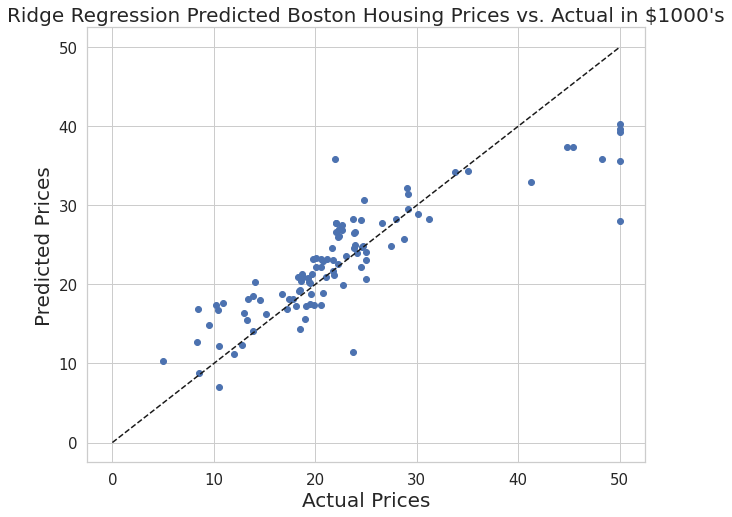

In [32]:
plt.figure(figsize=(10,8))
plt.scatter(y_test['mv'], y_predicted_rrm)
plt.plot([0, 50], [0, 50], '--k')
plt.axis('tight')
plt.ylabel('Predicted Prices', fontsize=20);
plt.xlabel('Actual Prices', fontsize=20);
plt.title("Ridge Regression Predicted Boston Housing Prices vs. Actual in $1000's", fontsize=20)

plt.rc('xtick', labelsize=15)
plt.rc('ytick', labelsize=15)

plt.show()

In [33]:
X = X_test
Y = y_test['mv']

print("Ridge Regression R_squared = ",rrm_mv.score(X,Y)) 
pred= rrm_mv.predict(X)
rmse = sqrt(mean_squared_error(pred, Y))
print('Ridge Regression RMSE = ', rmse)

Ridge Regression R_squared =  0.7249734067725664
Ridge Regression RMSE =  5.058946175917028


In [34]:
X = X_train
Y = y_train['mv']

print("Ridge Regression Train R_squared = ",rrm_mv.score(X,Y)) 
pred= rrm_mv.predict(X)
rmse = sqrt(mean_squared_error(pred, Y))
print('Ridge Regression Train RMSE = ', rmse)

Ridge Regression Train R_squared =  0.7579766237051254
Ridge Regression Train RMSE =  4.4520245852336


**Lasso**

In [35]:
#Lasso Regression
larm_mv = Lasso(alpha=0.001)

# Fit data on to the model
larm_mv.fit(X_train, y_train['mv'])

# Predict
y_predicted_larm = larm_mv.predict(X_test)

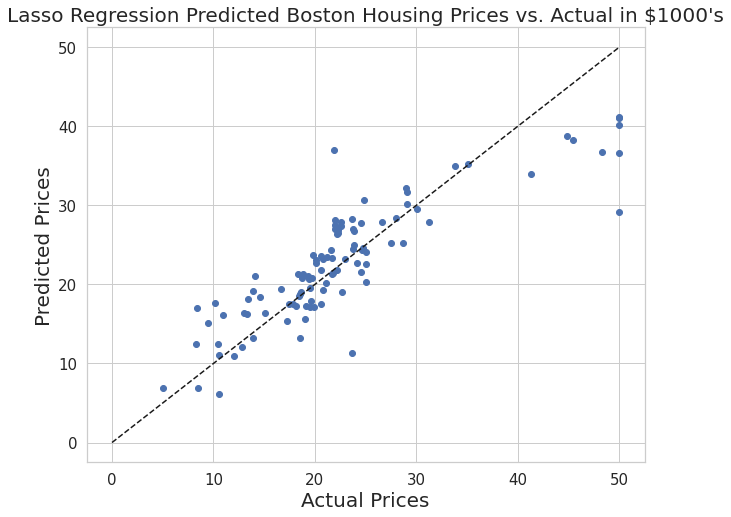

In [36]:
plt.figure(figsize=(10,8))
plt.scatter(y_test['mv'],y_predicted_larm)
plt.plot([0, 50], [0, 50], '--k')
plt.axis('tight')
plt.ylabel('Predicted Prices', fontsize=20);
plt.xlabel('Actual Prices', fontsize=20);
plt.title("Lasso Regression Predicted Boston Housing Prices vs. Actual in $1000's", fontsize=20)

plt.rc('xtick', labelsize=15)
plt.rc('ytick', labelsize=15)

plt.show()

In [37]:
X = X_test
Y = y_test['mv']

print("Lasso Regression Test R_squared = ",larm_mv.score(X,Y)) 
pred= larm_mv.predict(X)
rmse = sqrt(mean_squared_error(pred, Y))
print('Lasso Regression Test RMSE = ', rmse)

Lasso Regression Test R_squared =  0.7417504786584681
Lasso Regression Test RMSE =  4.902216380625342


In [38]:
X = X_train
Y = y_train['mv']

print("Lasso Regression Train R_squared = ",larm_mv.score(X,Y)) 
pred= larm_mv.predict(X)
rmse = sqrt(mean_squared_error(pred, Y))
print('Lasso Regression Train RMSE = ', rmse)

Lasso Regression Train R_squared =  0.7641136866896567
Lasso Regression Train RMSE =  4.395216452593365


**Elastic Net**

In [39]:
#Elastic Net
enrm_mv = ElasticNet(alpha=0.001)

# Fit data on to the model
enrm_mv.fit(X_train, y_train['mv'])

# Predict
y_predicted_enrm = enrm_mv.predict(X_test)

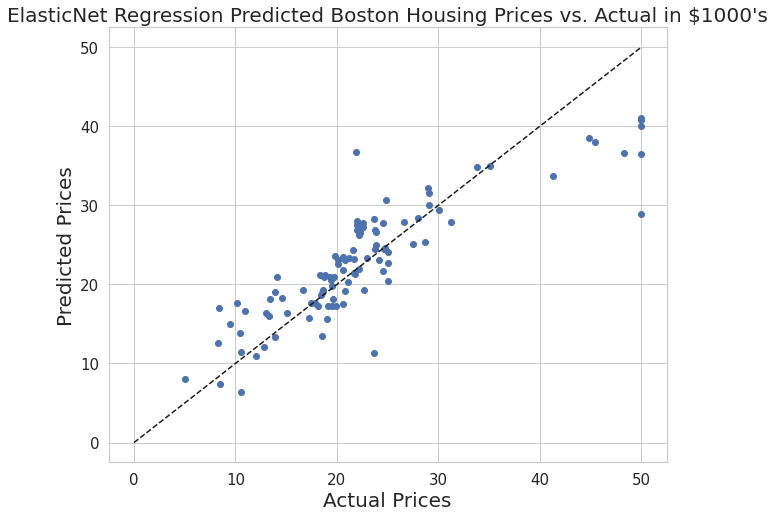

In [40]:
plt.figure(figsize=(10,8))
plt.scatter(y_test['mv'], y_predicted_enrm)
plt.plot([0, 50], [0, 50], '--k')
plt.axis('tight')
plt.ylabel('Predicted Prices', fontsize=20);
plt.xlabel('Actual Prices', fontsize=20);
plt.title("ElasticNet Regression Predicted Boston Housing Prices vs. Actual in $1000's", fontsize=20)

plt.rc('xtick', labelsize=15)
plt.rc('ytick', labelsize=15)

plt.show()

In [42]:
X = X_test
Y = y_test['mv']
print("ElasticNet Regression R_squared = ",enrm_mv.score(X,Y)) 
pred= enrm_mv.predict(X)
rmse = sqrt(mean_squared_error(pred, Y))
print('ElasticNet Regression RMSE = ', rmse)

ElasticNet Regression R_squared =  0.7387950955472792
ElasticNet Regression RMSE =  4.93018683589532


In [43]:
X = X_train
Y = y_train['mv']
print("ElasticNet Regression Train R_squared = ",enrm_mv.score(X,Y)) 
pred= enrm_mv.predict(X)
rmse = sqrt(mean_squared_error(pred, Y))
print('ElasticNet Regression Train RMSE = ', rmse)

ElasticNet Regression Train R_squared =  0.7636358156478461
ElasticNet Regression Train RMSE =  4.399666231733492


**Random Forest**

In [56]:
Randreg = RandomForestRegressor(oob_score=True)

# Fit data on to the model
Randreg.fit(X_train, y_train)

# Predict
y_predicted_Randreg = Randreg.predict(X_test)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


In [57]:
Randreg.oob_score_

0.8579293769050407

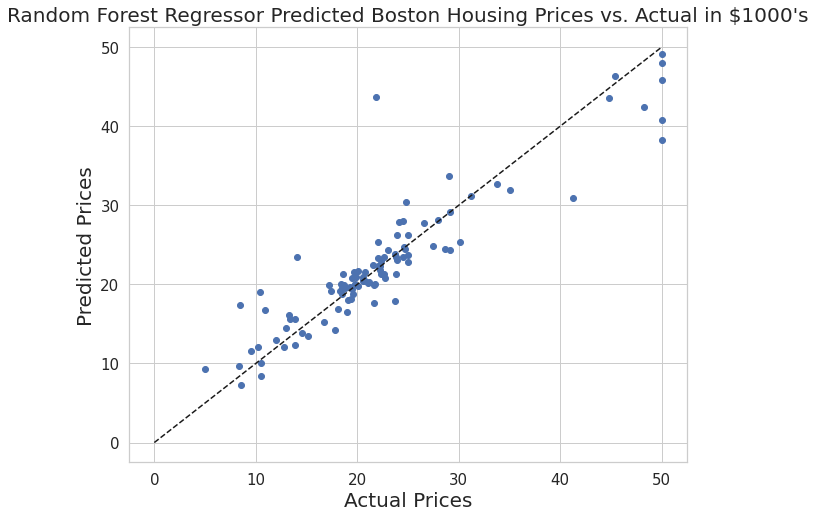

In [45]:
plt.figure(figsize=(10,8))
plt.scatter(y_test, y_predicted_Randreg)
plt.plot([0, 50], [0, 50], '--k')
plt.axis('tight')
plt.ylabel('Predicted Prices', fontsize=20);
plt.xlabel('Actual Prices', fontsize=20);
plt.title("Random Forest Regressor Predicted Boston Housing Prices vs. Actual in $1000's", fontsize=20)

plt.rc('xtick', labelsize=15)
plt.rc('ytick', labelsize=15)

plt.show()

In [47]:
X = X_test
Y = y_test['mv']
print("Random Forest Regressor R_squared = ",Randreg.score(X,Y)) 
pred= Randreg.predict(X)
rmse = sqrt(mean_squared_error(pred, Y))
print('Random Forest Regressor RMSE = ', rmse)

Random Forest Regressor R_squared =  0.8387427737068585
Random Forest Regressor RMSE =  3.8737564013322707


In [48]:
X = X_train
Y = y_train['mv']
print("Random Forest Regressor R_squared = ",Randreg.score(X,Y)) 
pred= Randreg.predict(X)
rmse = sqrt(mean_squared_error(pred, Y))
print('Random Forest Regressor RMSE = ', rmse)

Random Forest Regressor R_squared =  0.9794042978307671
Random Forest Regressor RMSE =  1.2987249916592785


**Extra Trees**

In [59]:
ETreg = ExtraTreesRegressor(bootstrap=True, oob_score=True)

# Fit data on to the model
ETreg.fit(X_train, y_train)

# Predict
y_predicted_ETreg = ETreg.predict(X_test)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


In [61]:
ETreg.oob_score_

0.8738378665364499

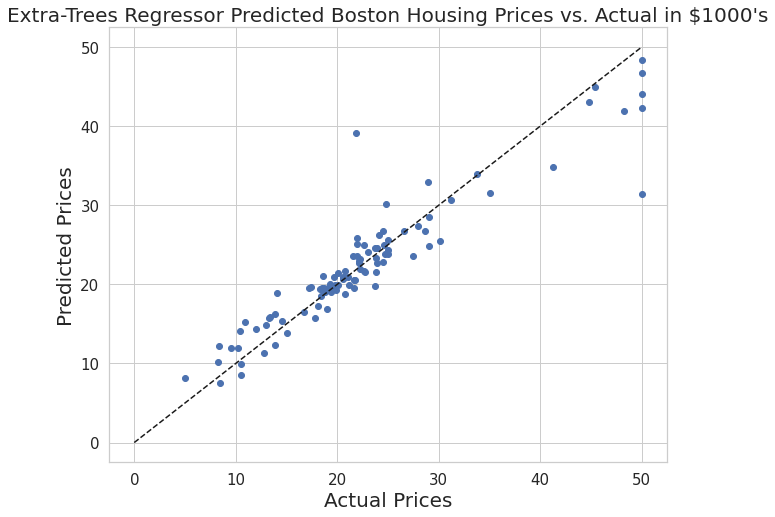

In [62]:
plt.figure(figsize=(10,8))
plt.scatter(y_test,y_predicted_ETreg)
plt.plot([0, 50], [0, 50], '--k')
plt.axis('tight')
plt.ylabel('Predicted Prices', fontsize=20);
plt.xlabel('Actual Prices', fontsize=20);
plt.title("Extra-Trees Regressor Predicted Boston Housing Prices vs. Actual in $1000's", fontsize=20)

plt.rc('xtick', labelsize=15)
plt.rc('ytick', labelsize=15)

plt.show()

In [63]:
X = X_test
Y = y_test['mv']
print("Extra-Trees Regressor R_squared = ",ETreg.score(X,Y)) 
pred= ETreg.predict(X)
rmse = sqrt(mean_squared_error(pred, Y))
print('Extra-Trees Regressor RMSE = ', rmse)

Extra-Trees Regressor R_squared =  0.8717220911059712
Extra-Trees Regressor RMSE =  3.4550047600773075


In [64]:
X = X_train
Y = y_train['mv']
print("Extra-Trees Regressor R_squared = ",ETreg.score(X,Y)) 
pred= ETreg.predict(X)
rmse = sqrt(mean_squared_error(pred, Y))
print('Extra-Trees Regressor RMSE = ', rmse)

Extra-Trees Regressor R_squared =  0.9831442476659786
Extra-Trees Regressor RMSE =  1.174905581839504


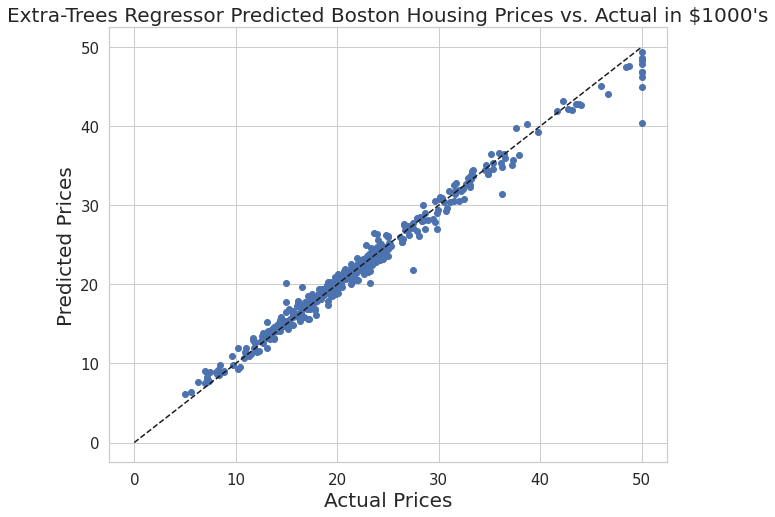

In [65]:
y_train_predict = ETreg.predict(X_train)
plt.figure(figsize=(10,8))
plt.scatter(y_train,y_train_predict)
plt.plot([0, 50], [0, 50], '--k')
plt.axis('tight')
plt.ylabel('Predicted Prices', fontsize=20);
plt.xlabel('Actual Prices', fontsize=20);
plt.title("Extra-Trees Regressor Predicted Boston Housing Prices vs. Actual in $1000's", fontsize=20)

plt.rc('xtick', labelsize=15)
plt.rc('ytick', labelsize=15)

plt.show()

In [66]:
ETreg.feature_importances_

array([0.0351, 0.0089, 0.0517, 0.0117, 0.044 , 0.3185, 0.0239, 0.0148,
       0.043 , 0.0423, 0.3648, 0.0413])

In [68]:
X_train.columns

Index(['crim', 'zn', 'indus', 'chas', 'nox', 'rooms', 'age', 'rad', 'tax',
       'ptratio', 'lstat', 'log_dis'],
      dtype='object')

In [75]:
columns = X_train.columns
importance = ETreg.feature_importances_
list(zip(columns, importance))

[('crim', 0.03513184484259608),
 ('zn', 0.008908637648921637),
 ('indus', 0.05170350819751042),
 ('chas', 0.011653607892042103),
 ('nox', 0.044026815852391425),
 ('rooms', 0.31846850677041433),
 ('age', 0.02392613616244935),
 ('rad', 0.014769693787055236),
 ('tax', 0.04301927941518191),
 ('ptratio', 0.04233706543158486),
 ('lstat', 0.3647879419880363),
 ('log_dis', 0.04126696201181617)]